In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [520]:
df = pd.read_csv('Data/laptopData.csv')
df.head()
df.shape

(1303, 12)

In [521]:
# df = df.dropna(subset=['Company'])

In [522]:
df['Price'] = df['Price'].interpolate(limit=1, method='linear', limit_direction='forward')

In [523]:
df.isnull().sum()

Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price                1
dtype: int64

In [524]:
df = df.dropna(subset=['Company'])

In [525]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

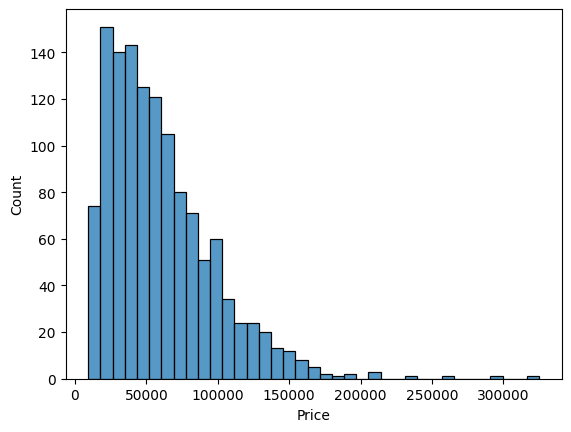

In [526]:
sns.histplot(x=df['Price'], data=df)
plt.show()

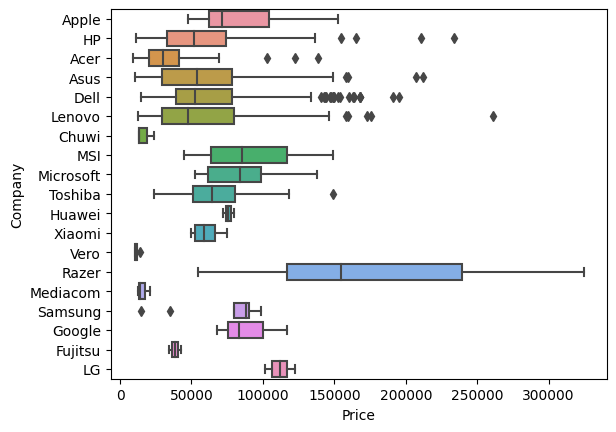

In [527]:
sns.boxplot(data=df, x=df['Price'], y=df['Company'])
plt.show()

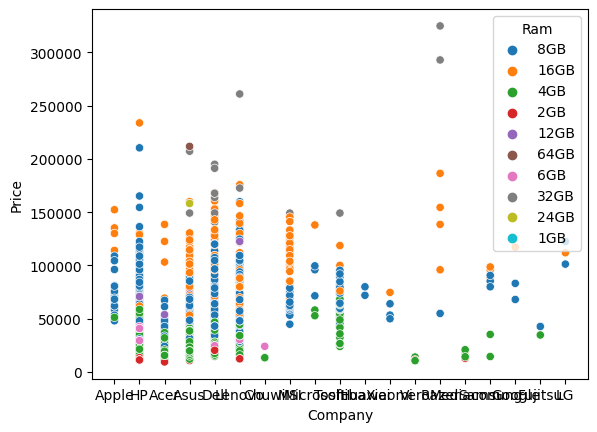

In [528]:
sns.scatterplot(data=df, x=df['Company'], y=df['Price'], hue='Ram')
plt.show()

In [529]:
# df = df.drop(columns=['Unnamed: 0'])

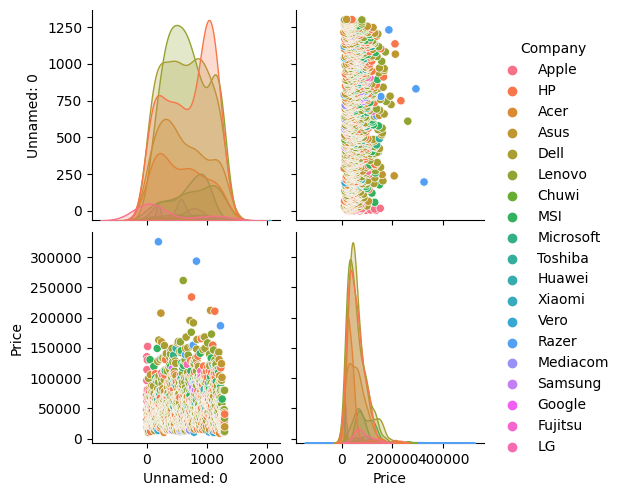

In [530]:
sns.pairplot(data=df, hue='Company')
plt.show()

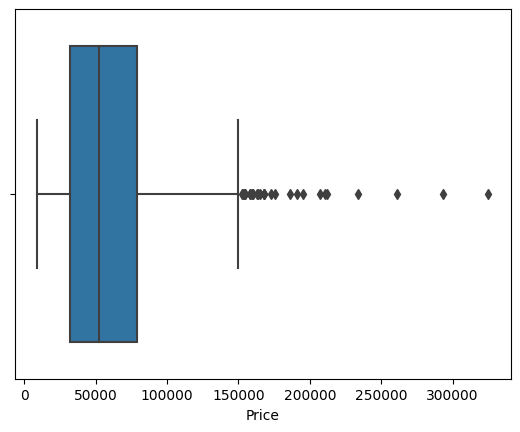

In [531]:
# Outliers

sns.boxplot(data=df, x = df['Price'])
plt.show()

In [532]:
# Removing Outliers

q1 = np.percentile(df['Price'], 25, method='midpoint')
q3 = np.percentile(df['Price'], 75, method='midpoint')
IQR = q3-q1

In [533]:
upper = q3+(1.5*IQR)
lower = q1-(1.5*IQR)
mask = (df['Price']<=lower) | (df['Price']>=upper)

In [534]:
df = df[~ mask]

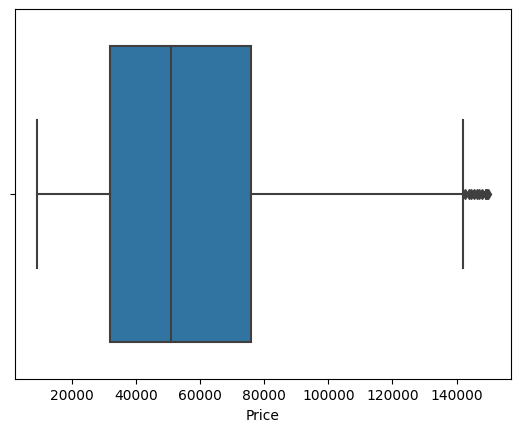

In [535]:
sns.boxplot(data=df, x=df['Price'])
plt.show()

In [536]:
df.shape

(1245, 12)